In [73]:
import pandas as pd
#read csv file side
# Specify the file path
file_path = '\\\\files.ubc.ca\\team\\PPRC\\Camera\\Video Assessment_Atefeh\\Video_quality_feed\\side.csv'

# Read the CSV file
data_side = pd.read_csv(file_path)

data_side['ID'] = data_side['ID'].astype(int).astype(str)


In [101]:
import pandas as pd
import glob

# Specify the folder path
folder_path = '../data/side/csv-sides'

# Get a list of CSV file paths in the folder
csv_files = glob.glob(folder_path + '/*.csv')

# Create an empty list to store the dataframes
dfs = []
right_feature = 'Right Speeds'
left_feature = 'Left Speeds'
all_features = []
# Iterate over the CSV file paths
for file_path in csv_files:
    # Read the CSV file and append the dataframe to the list
    df = pd.read_csv(file_path)
    user = file_path.split('\\')[-1].split('_')[0]
    filtered_df = df[(df[right_feature]<200) & (df[left_feature]<200)]
    mean_right = filtered_df[right_feature].mean()
    #mean_right = df['Right Distances'].sum()
    #mean_left = df['Left Distances'].sum()
    mean_left = filtered_df[left_feature].mean()
    if(mean_right>mean_left):
        all_features.append([user, 'Right',mean_right,mean_left])
    else:
        all_features.append([user,'Left',mean_right,mean_left])
        
df_results_side = pd.DataFrame(all_features, columns=['ID', 'Side', 'Right', 'Left'])

df_merged = pd.merge(data_side, df_results_side, on='ID', how='inner')

accuracy = (df_merged['Label'] == df_merged['Side']).mean()
print('Accuracy:', accuracy)



Accuracy: 0.7297297297297297


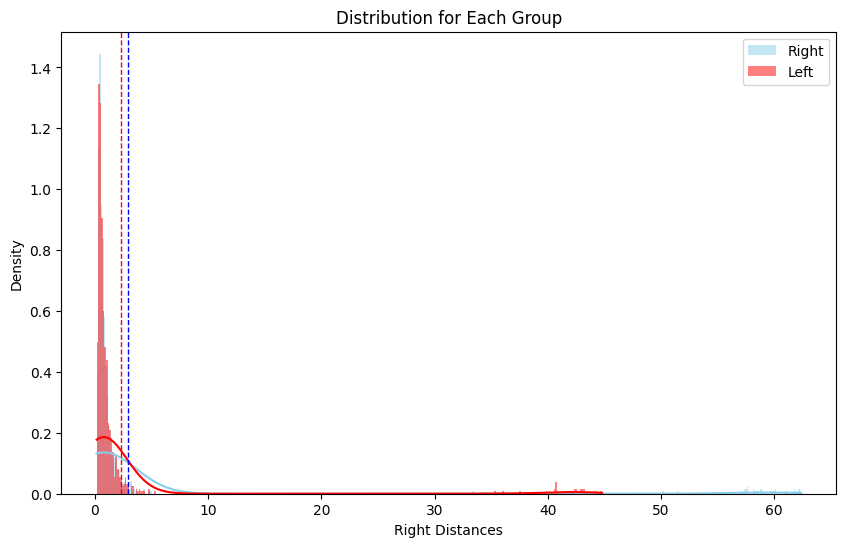

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, skew, kurtosis
import numpy as np

file_path = '../data/side/csv-sides/28411_20231023_facial_expression_happy-output.csv'
df_data = pd.read_csv(file_path)

# Creating the figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plotting the distribution for group 0
sns.histplot(df_data['Right Distances'], color="skyblue", label='Right', kde=True, stat="density", linewidth=0)

# Plotting the distribution for group 1
sns.histplot(df_data['Left Distances'], color="red", label='Left', kde=True, stat="density", linewidth=0)

# Adding some plot aesthetics
plt.title(f'Distribution for Each Group')
plt.ylabel('Density')
plt.legend()

#plot mean two distribution line
plt.axvline(df_data['Right Distances'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df_data['Left Distances'].mean(), color='red', linestyle='dashed', linewidth=1)

# Display the plot
plt.show()